In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
train_data = pd.read_csv("C:\\Users\\kckb36\\Desktop\\project_data\\train.csv")
test_data = pd.read_csv("C:\\Users\\kckb36\\Desktop\\project_data\\test.csv")
submission = pd.read_csv("C:\\Users\\kckb36\\Desktop\\project_data\\sample_submission.csv")


In [53]:
train_data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [70]:
mx_age = train_data['chol'].max()
min_age = train_data['chol'].min()
print(mx_age)
print(min_age)

564
131


In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        151 non-null    int64  
 1   age       151 non-null    int64  
 2   sex       151 non-null    int64  
 3   cp        151 non-null    int64  
 4   trestbps  151 non-null    int64  
 5   chol      151 non-null    int64  
 6   fbs       151 non-null    int64  
 7   restecg   151 non-null    int64  
 8   thalach   151 non-null    int64  
 9   exang     151 non-null    int64  
 10  oldpeak   151 non-null    float64
 11  slope     151 non-null    int64  
 12  ca        151 non-null    int64  
 13  thal      151 non-null    int64  
 14  target    151 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 17.8 KB


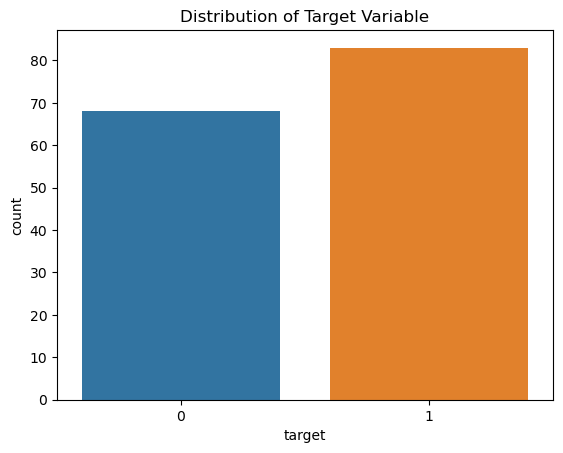

In [56]:
# 타겟 변수 분포
sns.countplot(x='target', data=train_data)
plt.title('Distribution of Target Variable')
plt.show()

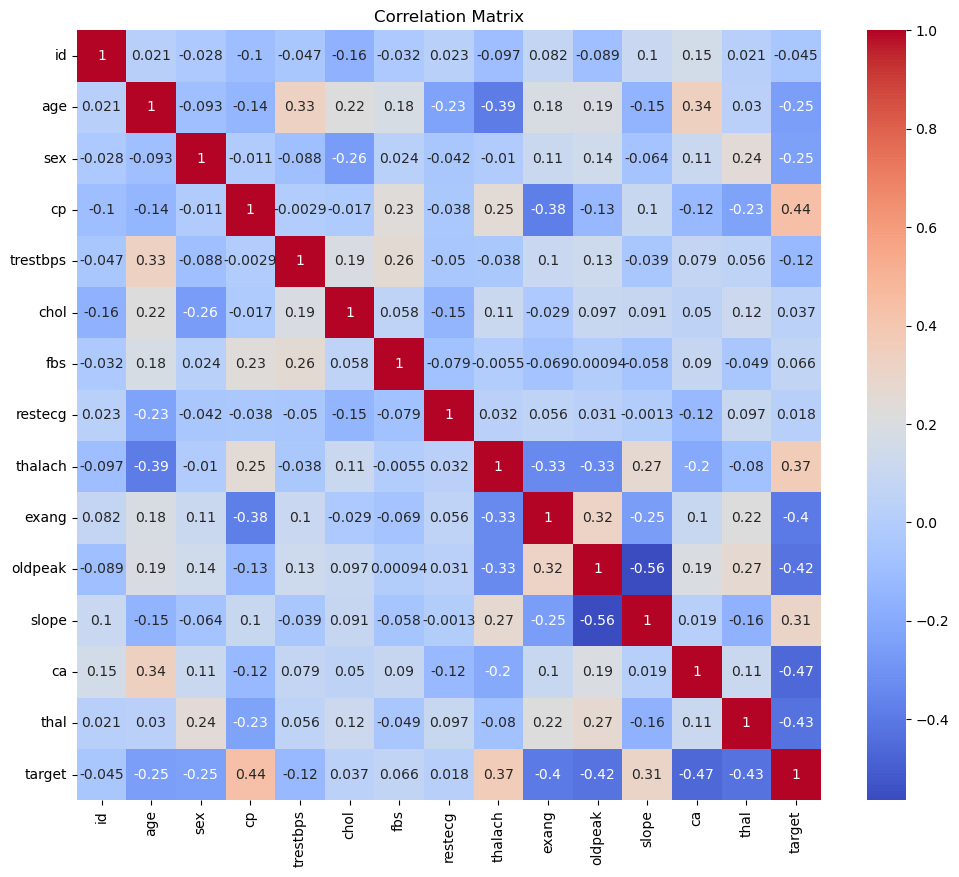

In [62]:
# 상관관계 히트맵
plt.figure(figsize=(12, 10))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

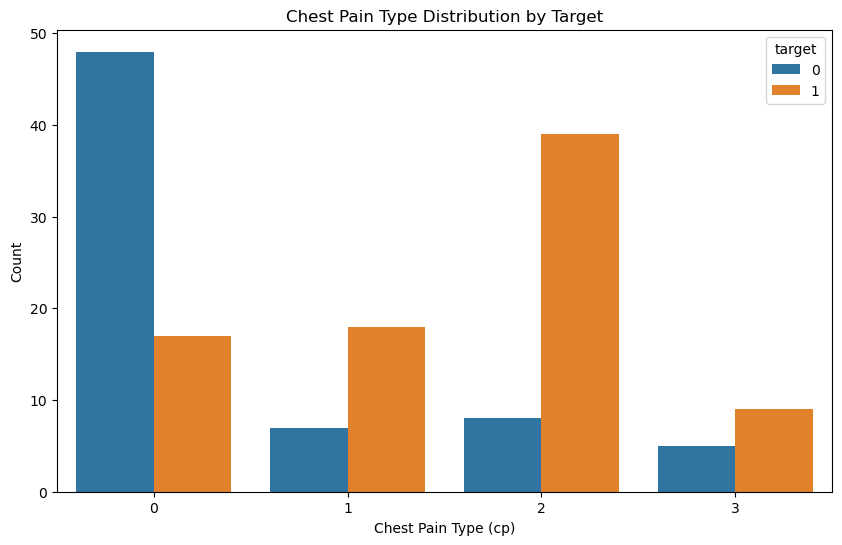

In [63]:
# cp와 target 관계
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=train_data)
plt.title('Chest Pain Type Distribution by Target')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.show()

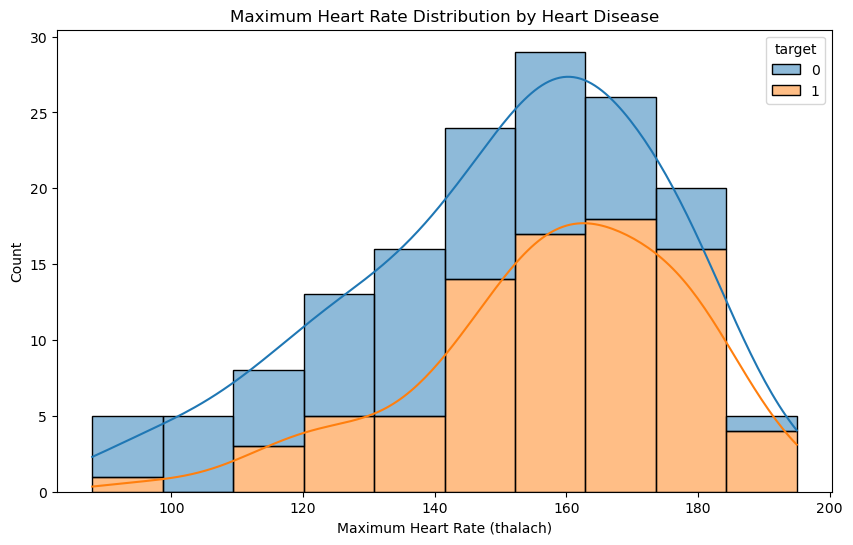

In [65]:
# thalach와 target 관계
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='thalach', hue='target', multiple='stack', kde=True)
plt.title('Maximum Heart Rate Distribution by Heart Disease')
plt.xlabel('Maximum Heart Rate (thalach)')
plt.ylabel('Count')
plt.show()

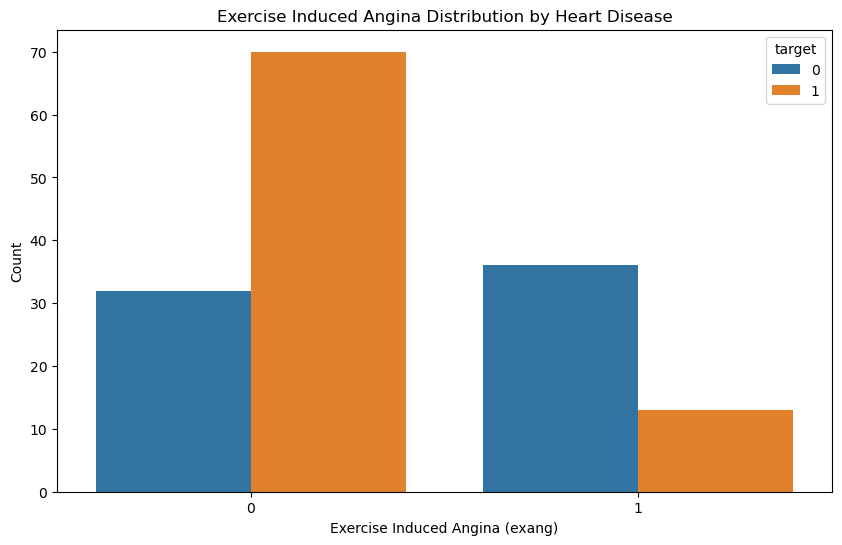

In [66]:
# exang과 target 관계
plt.figure(figsize=(10, 6))
sns.countplot(x='exang', hue='target', data=train_data)
plt.title('Exercise Induced Angina Distribution by Heart Disease')
plt.xlabel('Exercise Induced Angina (exang)')
plt.ylabel('Count')
plt.show()

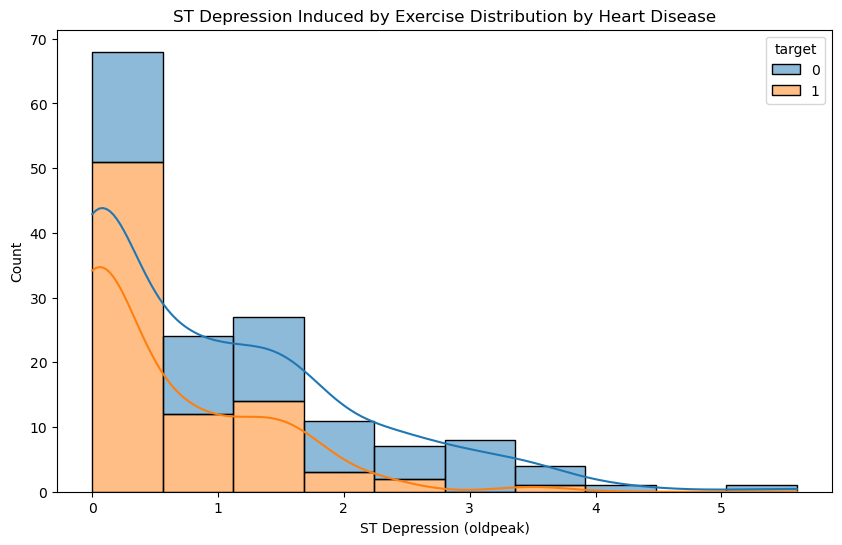

In [67]:
# oldpeak와 target 관계
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='oldpeak', hue='target', multiple='stack', kde=True)
plt.title('ST Depression Induced by Exercise Distribution by Heart Disease')
plt.xlabel('ST Depression (oldpeak)')
plt.ylabel('Count')
plt.show()

In [35]:
# 독립변수와 종속변수 분리
X = train_data.drop(columns=['id','target'])
y = train_data['target']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

In [36]:
# Logistic Regression 모델 생성 및 학습
model = LogisticRegression(max_iter = 5000)
model.fit(X_train,y_train)

# 검증 데이터에 대한 예측
y_var_pred = model.predict(X_valid)

# 모델 성능 평가
score = f1_score(y_valid, y_var_pred, average='micro')
print(score)

0.8387096774193549


In [37]:
# 테스트 데이터 전처리
X_test = test_data.drop(columns=['id'])
X_test_scaled = scaler.transform(X_test)

# 테스트 데이터 예측
test_pred = model.predict(X_test_scaled)

# 예측 결과를 데이터프레임에 추가
test_data['target'] = test_pred

# 예측 결과를 저장
submission = test_data[['id','target']]
submission_file_path = "C:\\Users\\kckb36\\Desktop\\project_data\\sample_submission.csv"
submission.to_csv(submission_file_path, index=False)

print(submission.head())

   id  target
0   1       0
1   2       1
2   3       1
3   4       0
4   5       1
